In [4]:
import cvxpy as cp
import numpy as np

$ \text{Max} \sum_{i}\lambda_{i}^Dy_{i}^D-\sum_{j}\lambda_{j}^Gy_{j}^G $

$\text{S.T} \ \sum_{i}y_{i}^{D,k} -\sum_{j}y_{j}^{G,K}=\sum_{l \in L_{k}} B_{kl}(\delta_{k}-\delta_l)$

$0 \le y_{i}^D \le P_{i}^D$

$0 \le y_{j}^G \le P_{j}^G$

In [537]:
ofer_price_G=[0,0,15,30,32.5,34,36,37.5,39,40,60,70,100,150,200]
Pg=[120,50,200,400,60,50,60,100,70,50,70,45,50,60,50]
ofer_price_D=[200,110,100,90,85,75,65,40,38,31,24,16]
Pd=[250,300,120,80,40,70,60,45,30,35,25,10]


In [538]:
c=ofer_price_G
for i in ofer_price_D : # making C as concatenated array
    c.append(-1*i)
c=np.asarray(c)
c=c.reshape(c.shape[0],1)

b=Pg
A_eq=list(np.ones(len(Pg)))

for i in Pd : # making C as concatenated array
    b.append(i)
    A_eq.append(-1)
b=np.asarray(b)
b=b.reshape(b.shape[0],1)
A_eq=np.asarray(A_eq)  
A_eq=A_eq.reshape(A_eq.shape[0],1)

In [539]:
# Problem data.
m = c.shape[0]
A = np.diag(np.ones(b.shape[0]))
# Construct the problem.
x2 = cp.Variable((m,1))
objective = cp.Minimize(c.T*x2)
#objective=cp.Minimize((1/2)*cp.quad_form(b-A@x2,sigmav))
constraints = [A*x2<=b,x2>=0,A_eq.T*x2==0]
prob = cp.Problem(objective, constraints)
prob.solve()
#print("Optimal value", prob.solve())
#print("Optimal line status")
G=[]
D=[]
print("\n Market clearing price ",np.abs(prob.constraints[2].dual_value[0]))
for i in range (m-len(Pd)):
    G.append(x2.value[i][0])
for i in range (m-len(Pd),x2.shape[0]):
    D.append(x2.value[i][0])
    
print("Total cleared MWH= ",np.sum(G))    


 Market clearing price  [37.50000002]
Total cleared MWH=  994.9999966833908


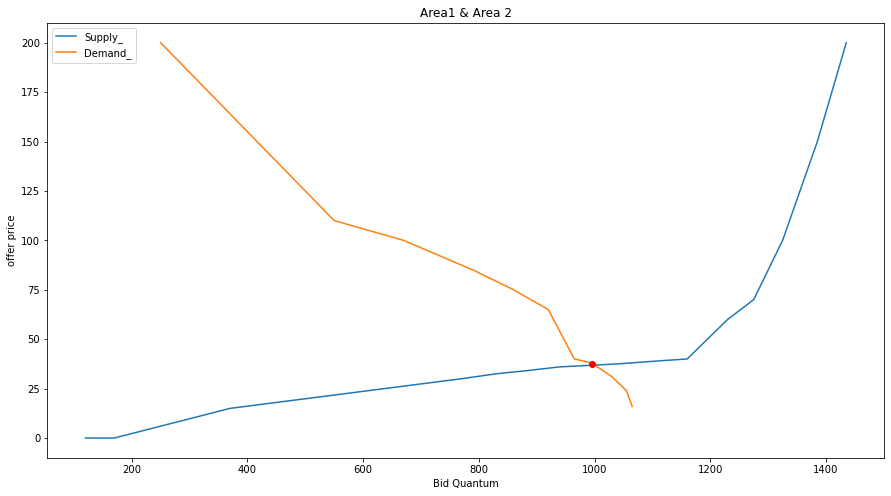

In [543]:
ofer_price_G=[0,0,15,30,32.5,34,36,37.5,39,40,60,70,100,150,200]
Pg=[120,50,200,400,60,50,60,100,70,50,70,45,50,60,50]
ofer_price_D=[200,110,100,90,85,75,65,40,38,31,24,16]
Pd=[250,300,120,80,40,70,60,45,30,35,25,10]

j=[]
for i in range (len(Pg)):
    if(i>0):
        j.append(j[i-1]+Pg[i])
    else:
        j.append(Pg[i])
j2=[]
for i in range (len(Pd)):
    if(i>0):
        j2.append(j2[i-1]+Pd[i])
    else:
        j2.append(Pd[i]) 
        
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.title('Area1 & Area 2')
plt.ylabel('offer price')
plt.xlabel('Bid Quantum')
plt.plot(j,ofer_price_G)
plt.plot(j2, ofer_price_D)
plt.plot(np.sum(G),np.abs(prob.constraints[2].dual_value[0]),'ro')
plt.legend(["Supply_", "Demand_"])
plt.savefig('oneprice.jpg')
plt.show()

In [511]:
c=ofer_price_G
for i in ofer_price_D : # making C as concatenated array
    c.append(-1*i)
c=np.asarray(c)
c=c.reshape(c.shape[0],1)

b=Pg
A_eq=list(np.ones(len(Pg)))

for i in Pd : # making C as concatenated array
    b.append(i)
    A_eq.append(-1)
b=np.asarray(b)
b=b.reshape(b.shape[0],1)
A_eq=np.asarray(A_eq)  
A_eq=A_eq.reshape(A_eq.shape[0],1)


# dividing two areas
k=[1,3,5,10,12,13,14,16,18,21,24,25,26]
A_eq1=np.zeros(27)
A_eq2=np.zeros(27)
for i in range (27):
    if(i in k):
        A_eq1[i]=0
        A_eq2[i]=A_eq[i]
    else:
        A_eq1[i]=A_eq[i]
        A_eq2[i]=0
A_eq1=A_eq1.reshape(A_eq.shape[0],1) 
A_eq2=A_eq2.reshape(A_eq.shape[0],1)

In [512]:
print("\n Net area1 G-D=",np.dot(A_eq1.T,x2.value))
print("\n area2 G-D=",np.dot(A_eq2.T,x2.value))


 Net area1 G-D= [[-59.99999952]]

 area2 G-D= [[59.99999952]]


In [513]:
trans_limit=input("Enter tranmsssion limit between A & B : ")

Enter tranmsssion limit between A & B : 40


In [514]:
# Problem data.
if(abs(np.dot(A_eq1.T,x2.value))>int(trans_limit)):
    m = c.shape[0]
    A = np.diag(np.ones(b.shape[0]))
    # Construct the problem.
    x2 = cp.Variable((m,1))
    objective = cp.Minimize(c.T*x2)
    #objective=cp.Minimize((1/2)*cp.quad_form(b-A@x2,sigmav))
    constraints = [A*x2<=b,x2>=0,A_eq1.T*x2==-int(trans_limit),A_eq2.T*x2==int(trans_limit)]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    #print("Optimal value", prob.solve())
    #print("Optimal line status")
    G1=[]
    D1=[]
    print("\n Market clearing prices ",np.abs(prob.constraints[2].dual_value[0]),np.abs(prob.constraints[3].dual_value[0]))
        


 Market clearing prices  [37.50000013] [34.00000019]


In [515]:
print("\n Net area1 G-D=",np.dot(A_eq1.T,x2.value))
print("\n area2 G-D=",np.dot(A_eq2.T,x2.value))


 Net area1 G-D= [[-40.]]

 area2 G-D= [[40.]]


In [516]:
Area_1G=[]
oprice1G=[]
Area_2G=[]
oprice2G=[]
s=0
for i in range (len(k)):
    if i in k[0:6]:
        oprice2G.append(ofer_price_G[i])
        if(s==0):  
            Area_2G.append(x2.value[i][0])
            s=s+1
        else:
            Area_2G.append(Area_2G[s-1]+x2.value[i][0])
            s=s+1
s=0            
for i in range (len(k)):
    if i not in k[0:6] and i<15:
        oprice1G.append(ofer_price_G[i])
        if(s==0):  
            Area_1G.append(x2.value[i][0])
            s=s+1
        else:
            Area_1G.append(Area_1G[s-1]+x2.value[i][0])
            s=s+1
            
Area_1D=[]
oprice1D=[]
Area_2D=[]
oprice2D=[]
s=0
for i in range (len(x2.value)):
    if i in k[7:]:
        oprice2D.append(-1*ofer_price_G[i])
        if(s==0):  
            Area_2D.append(x2.value[i][0])
            s=s+1
        else:
            Area_2D.append(Area_2D[s-1]+x2.value[i][0])
            s=s+1
s=0            
for i in range (len(x2.value)):
    if i not in k[7:] and i>14 :
        oprice1D.append(-1*ofer_price_G[i])
        if(s==0):  
            Area_1D.append(x2.value[i][0])
            s=s+1
        else:
            Area_1D.append(Area_1D[s-1]+x2.value[i][0])
            s=s+1            

In [519]:
Area_2G

[49.99999994145395,
 449.99999985681234,
 480.0000003291893,
 480.00000042422613,
 480.00000045112245]

In [520]:
Area_2D

[299.99999995895655,
 379.9999999273694,
 439.9999997946249,
 440.00000022430083,
 440.000000389897,
 440.00000047554727]

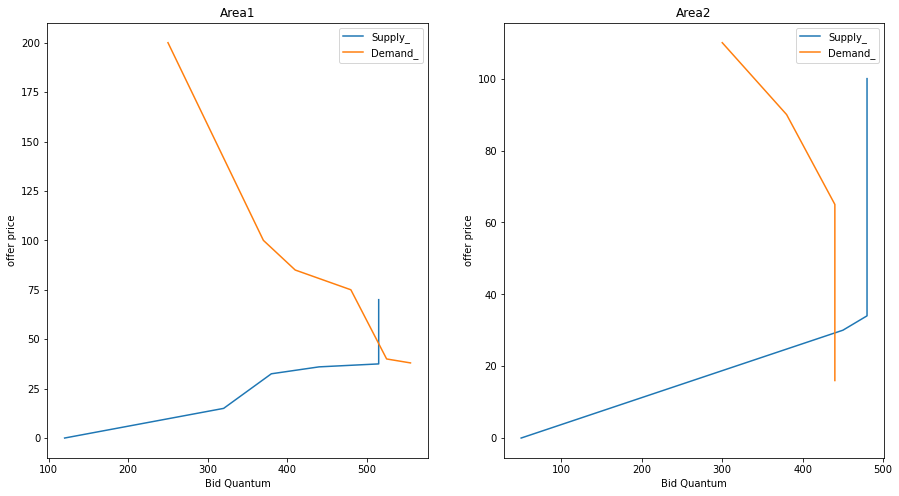

In [536]:
plt.figure(figsize=(15,8))


plt.subplot(1, 2, 1)
plt.title('Area1')
plt.ylabel('offer price')
plt.xlabel('Bid Quantum')

plt.plot(Area_1G,oprice1G)
plt.plot(Area_1D,oprice1D)
#plt.plot(Area_1D[-1], np.abs(prob.constraints[2].dual_value[0]), 'ro')
#plt.plot(Area_1G[-1], np.abs(prob.constraints[2].dual_value[0]), 'yo')
plt.legend(["Supply_", "Demand_"])
plt.savefig('Area1price.jpg')

plt.subplot(1, 2, 2)
plt.title('Area2')
plt.ylabel('offer price')
plt.xlabel('Bid Quantum')
plt.plot(Area_2G,oprice2G)
plt.plot(Area_2D,oprice2D)
#plt.plot(Area_2D[-1], np.abs(prob.constraints[3].dual_value[0]), 'ro')
#plt.plot(Area_2G[-1], np.abs(prob.constraints[3].dual_value[0]), 'yo')
plt.legend(["Supply_", "Demand_"])
plt.savefig('Area2price.jpg')

plt.show()